<a href="https://colab.research.google.com/github/yl980/ylee006/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
"""
필요한 함수들을 불러오기:
keras & tensorflow - mnist 예제 데이터를 위한 라이브러리 (대체 가능),
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기,
sklearn - Random Forest, partial dependencd, 추가 데이터
등...
"""

from sklearn.datasets import fetch_openml
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error # 오차계산을 위한 함수 평균제곱오차(MSE)
from sklearn import preprocessing

from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset 1
#from sklearn.datasets import load_boston # calling dataset 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# keras에 있는 샘플데이터(mnist) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist에 내제되어 있는 데이터셋의 구성대로 불러오기
# 불러온 minst 데이터가 맞게 들어왔는지 확인
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
# data format 확인하기
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

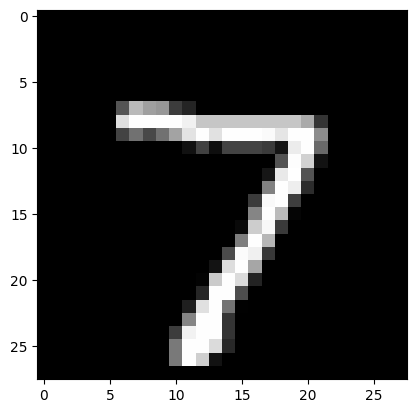

In [7]:
# data 그림으로 확인하기
plt.figure()
plt.imshow(x_test[0], cmap='gray')

In [8]:
# 계산의 용이성을 위해 데이터의 형태 바꾸기 (28개의 행 -> 1행)
# 28 X 28 매트릭스 --> 1 X 784 매트릭스로 변환 (부록 B 참조)
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32')  # 데이터의 정규화를 위한 형식변경
X_test = X_test.astype('float32')
X_train /=255   # 256 색 데이터의 정규화(0~1 사이의 값으로 일반화, Normalization)
X_test /=255
print("X Training matrix shape", X_train.shape) # 변환된 데이터 확인
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [9]:
Y_train = to_categorical(y_train, 10) # One-hot Encoding으로 입력값 일반화
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [10]:
rf = RandomForestClassifier(n_jobs=-1) # use all CPU cores
rf.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1)

In [11]:
print(rf.feature_importances_) # 변수 중요도 확인

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.67667730e-06 3.60760022e-07
 3.63006769e-07 2.73069368e-06 3.72816959e-06 7.59406071e-06
 2.25665154e-06 1.79354915e-06 2.15821857e-06 7.14217727e-06
 9.70442026e-06 3.90577389e-06 1.40664082e-06 7.84316452e-07
 1.21324644e-06 3.59132504e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.47017113e-07 0.00000000e+00 4.23507774e-06 4.72986286e-06
 1.72023054e-05 2.186388

In [13]:
# 모델의 교차검증
scores = cross_validate(rf,  X_train, Y_train,
                        return_train_score = True, n_jobs =-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


1.0 0.8897


In [14]:
# 모델의 교차검증 (다른 방법)
cross_val_score(rf, X_train, Y_train, cv=5, scoring="accuracy")

array([0.89475   , 0.88966667, 0.88383333, 0.88541667, 0.89908333])

In [15]:
# 훈련된 random forest 모델을 이용하여 테스트 하기
prediction = rf.predict(X_test)
result = (prediction == Y_test).mean()
print('Test accuracy:', result)

Test accuracy: 0.98952


[8 4 4 9 4 5 7 0 4]


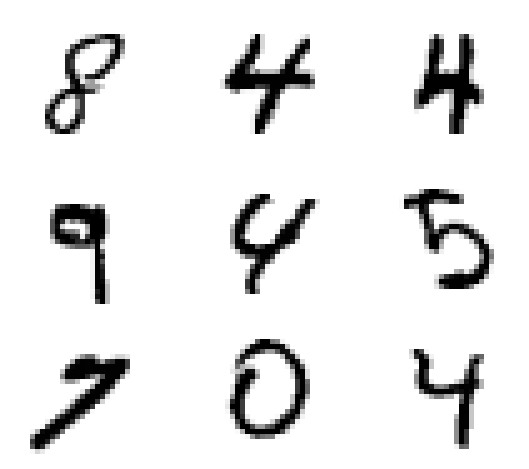

In [16]:
fig = plt.figure()
random_pick = np.random.randint(low=0, high=10000, size=9)
print(y_test[random_pick])

for i in range(9):
    idx = random_pick[i]
    img = np.reshape(X_test[idx], (28, 28))
    plot = fig.add_subplot(3, 3, i+1)
    plot.imshow(img, cmap = 'binary')
    plot.axis('off')
    plt.tight_layout()

In [2]:
# Sample data (보스턴 주택 데이터)를 읽은 뒤 데이터 분할
#boston_data = load_boston() # Boston data 읽기
boston_data = pd.read_csv('housing.csv')
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
Y = pd.Series(boston_data.target)

ERROR: ignored

In [3]:
# 필요한 R 라이브러리 호출하기
if (!require('dplyr')) install.packages("dplyr")
if (!require('data.table')) install.packages("data.table")
if (!require('ggplot2')) install.packages("ggplot2")
if (!require('reshape2')) install.packages("reshape2")
if (!require('readr')) install.packages("readr")
if (!require('randomForest')) install.packages("randomForest")
if (!require('ISLR2')) install.packages("ISLR2")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: ggplot2

Loading required package: reshape2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape2’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Loading required package: readr

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/s

In [4]:
# (샘플 데이터를 불러오기 위한) 현재 디렉토리 확인
file_path <- getwd()
file_path

[1] "/content"

In [5]:
# housing.csv로 되어있는 파일 불러오기
# 샘플 파일위치 >>> https://github.com/ycanns/DeepLearning_Class_NRC/blob/master/data/housing.zip
# 해당 링크를 이용하여, 파일을 다운로드하여 압축을 해제한 뒤 사용
# 컬럼별 설명은 해당링크 참조 >>> https://rdrr.io/cran/ISLR2/man/Boston.html


# option 1) 내컴퓨터에 있는 파일을 사용할 경우
Boston <- read_delim(paste0(file_path, "/housing.csv"), ",",
                     escape_double = FALSE, trim_ws = TRUE, locale=locale(encoding="UTF-8"))

# option 2) 공개된 데이터를 가져올 경우, ISLR2 라이브러리에 있는 Boston 데이터를 불러오면 됩니다
#Boston <- Boston


Boston

Rows: 506 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, lstat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


crim     zn   indus chas nox   rm    age   dis    rad tax ptratio lstat
1   0.00632  18.0 2.31  0    0.538 6.575  65.2 4.0900 1   296 15.3     4.98
2   0.02731   0.0 7.07  0    0.469 6.421  78.9 4.9671 2   242 17.8     9.14
3   0.02729   0.0 7.07  0    0.469 7.185  61.1 4.9671 2   242 17.8     4.03
4   0.03237   0.0 2.18  0    0.458 6.998  45.8 6.0622 3   222 18.7     2.94
5   0.06905   0.0 2.18  0    0.458 7.147  54.2 6.0622 3   222 18.7     5.33
6   0.02985   0.0 2.18  0    0.458 6.430  58.7 6.0622 3   222 18.7     5.21
7   0.08829  12.5 7.87  0    0.524 6.012  66.6 5.5605 5   311 15.2    12.43
8   0.14455  12.5 7.87  0    0.524 6.172  96.1 5.9505 5   311 15.2    19.15
9   0.21124  12.5 7.87  0    0.524 5.631 100.0 6.0821 5   311 15.2    29.93
10  0.17004  12.5 7.87  0    0.524 6.004  85.9 6.5921 5   311 15.2    17.10
11  0.22489  12.5 7.87  0    0.524 6.377  94.3 6.3467 5   311 15.2    20.45
12  0.11747  12.5 7.87  0    0.524 6.009  82.9 6.2267 5   311 15.2    13.27
13  0.09378  12.5 7.87  0    0.524 5.889  39.0 5.4509 5   311 15.2    15.71
14  0.62976   0.0 8.14  0    0.538 5.949  61.8 4.7075 4   307 21.0     8.26
15  0.63796   0.0 8.14  0    0.538 6.096  84.5 4.4619 4   307 21.0    10.26
16  0.62739   0.0 8.14  0    0.538 5.834  56.5 4.4986 4   307 21.0     8.47
17  1.05393   0.0 8.14  0    0.538 5.935  29.3 4.4986 4   307 21.0     6.58
18  0.78420   0.0 8.14  0    0.538 5.990  81.7 4.2579 4   307 21.0    14.67
19  0.80271   0.0 8.14  0    0.538 5.456  36.6 3.7965 4   307 21.0    11.69
20  0.72580   0.0 8.14  0    0.538 5.727  69.5 3.7965 4   307 21.0    11.28
21  1.25179   0.0 8.14  0    0.538 5.570  98.1 3.7979 4   307 21.0    21.02
22  0.85204   0.0 8.14  0    0.538 5.965  89.2 4.0123 4   307 21.0    13.83
23  1.23247   0.0 8.14  0    0.538 6.142  91.7 3.9769 4   307 21.0    18.72
24  0.98843   0.0 8.14  0    0.538 5.813 100.0 4.0952 4   307 21.0    19.88
25  0.75026   0.0 8.14  0    0.538 5.924  94.1 4.3996 4   307 21.0    16.30
26  0.84054   0.0 8.14  0    0.538 5.599  85.7 4.4546 4   307 21.0    16.51
27  0.67191   0.0 8.14  0    0.538 5.813  90.3 4.6820 4   307 21.0    14.81
28  0.95577   0.0 8.14  0    0.538 6.047  88.8 4.4534 4   307 21.0    17.28
29  0.77299   0.0 8.14  0    0.538 6.495  94.4 4.4547 4   307 21.0    12.80
30  1.00245   0.0 8.14  0    0.538 6.674  87.3 4.2390 4   307 21.0    11.98
⋮   ⋮        ⋮    ⋮     ⋮    ⋮     ⋮     ⋮     ⋮      ⋮   ⋮   ⋮       ⋮    
477  4.87141 0    18.10 0    0.614 6.484 93.6  2.3053 24  666 20.2    18.68
478 15.02340 0    18.10 0    0.614 5.304 97.3  2.1007 24  666 20.2    24.91
479 10.23300 0    18.10 0    0.614 6.185 96.7  2.1705 24  666 20.2    18.03
480 14.33370 0    18.10 0    0.614 6.229 88.0  1.9512 24  666 20.2    13.11
481  5.82401 0    18.10 0    0.532 6.242 64.7  3.4242 24  666 20.2    10.74
482  5.70818 0    18.10 0    0.532 6.750 74.9  3.3317 24  666 20.2     7.74
483  5.73116 0    18.10 0    0.532 7.061 77.0  3.4106 24  666 20.2     7.01
484  2.81838 0    18.10 0    0.532 5.762 40.3  4.0983 24  666 20.2    10.42
485  2.37857 0    18.10 0    0.583 5.871 41.9  3.7240 24  666 20.2    13.34
486  3.67367 0    18.10 0    0.583 6.312 51.9  3.9917 24  666 20.2    10.58
487  5.69175 0    18.10 0    0.583 6.114 79.8  3.5459 24  666 20.2    14.98
488  4.83567 0    18.10 0    0.583 5.905 53.2  3.1523 24  666 20.2    11.45
489  0.15086 0    27.74 0    0.609 5.454 92.7  1.8209  4  711 20.1    18.06
490  0.18337 0    27.74 0    0.609 5.414 98.3  1.7554  4  711 20.1    23.97
491  0.20746 0    27.74 0    0.609 5.093 98.0  1.8226  4  711 20.1    29.68
492  0.10574 0    27.74 0    0.609 5.983 98.8  1.8681  4  711 20.1    18.07
493  0.11132 0    27.74 0    0.609 5.983 83.5  2.1099  4  711 20.1    13.35
494  0.17331 0     9.69 0    0.585 5.707 54.0  2.3817  6  391 19.2    12.01
495  0.27957 0     9.69 0    0.585 5.926 42.6  2.3817  6  391 19.2    13.59
496  0.17899 0     9.69 0    0.585 5.670 28.8  2.7986  6  391 19.2    17.60
497  0.28960 0     9.69 0    0.585 5.390 72.9  2.798

In [6]:
# 데이터의 통계분포 등 확인
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

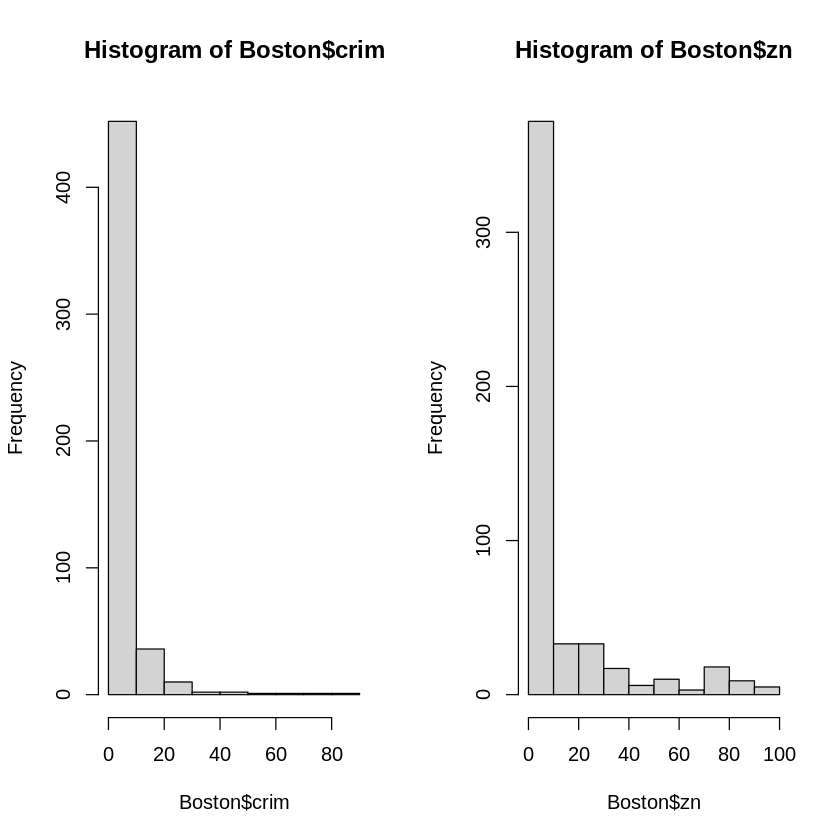

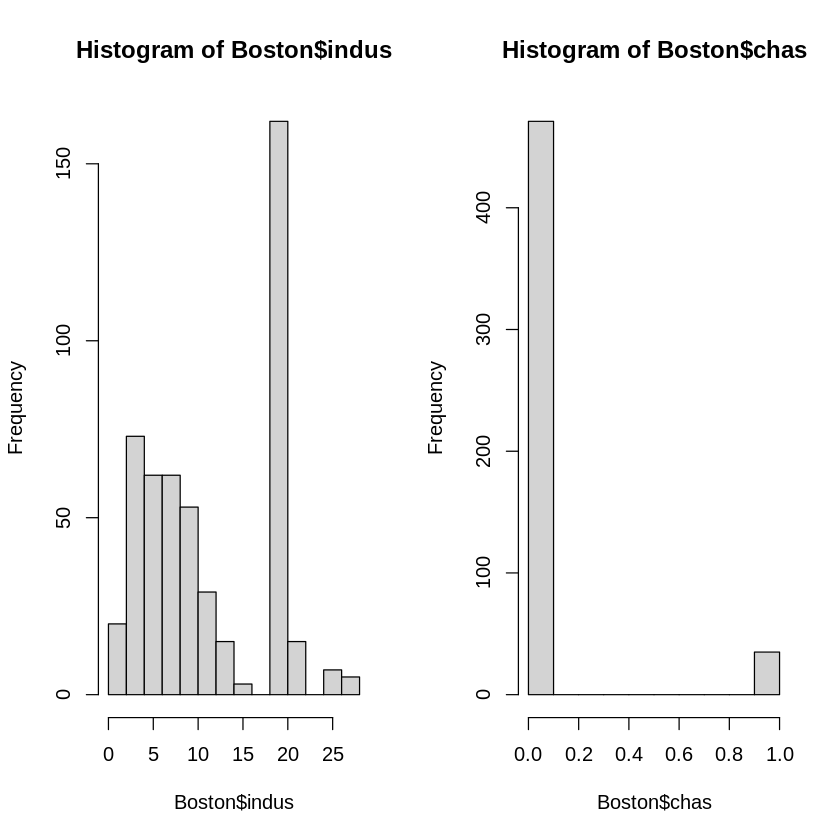

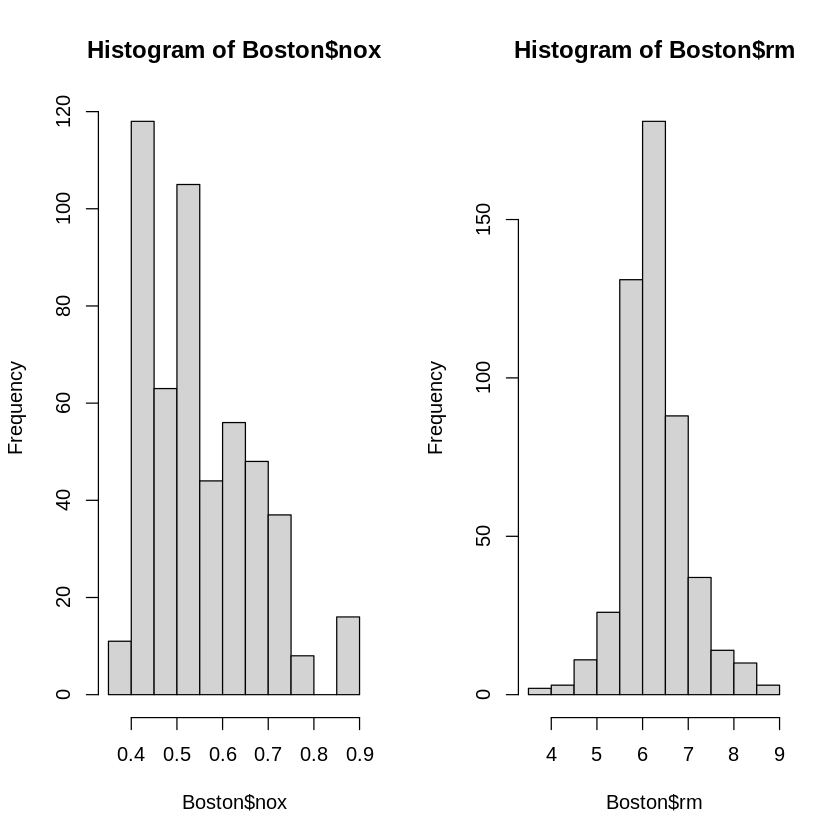

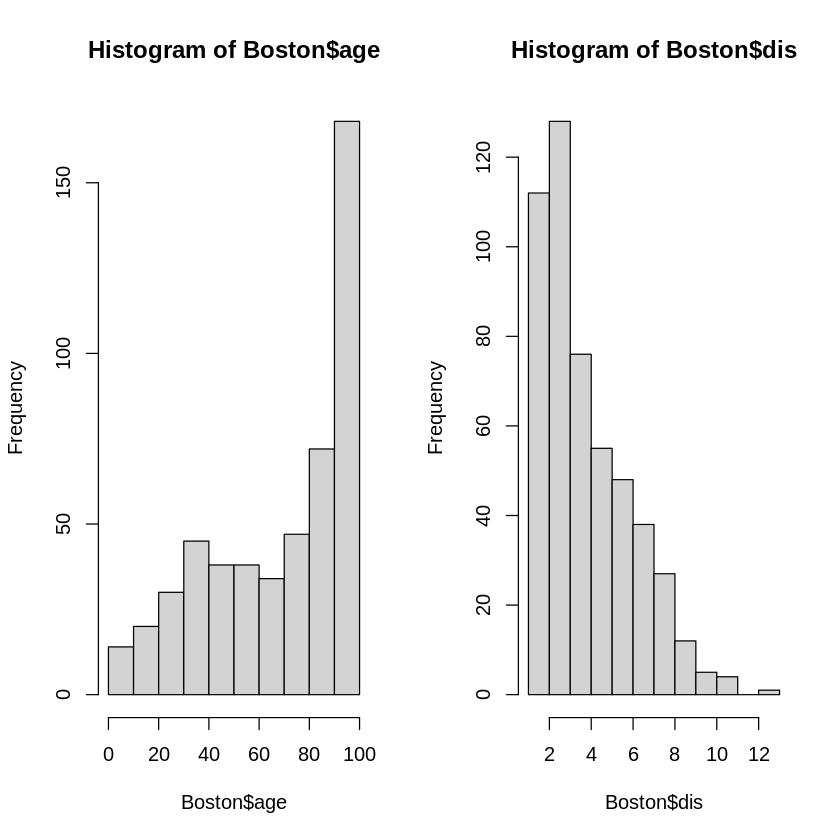

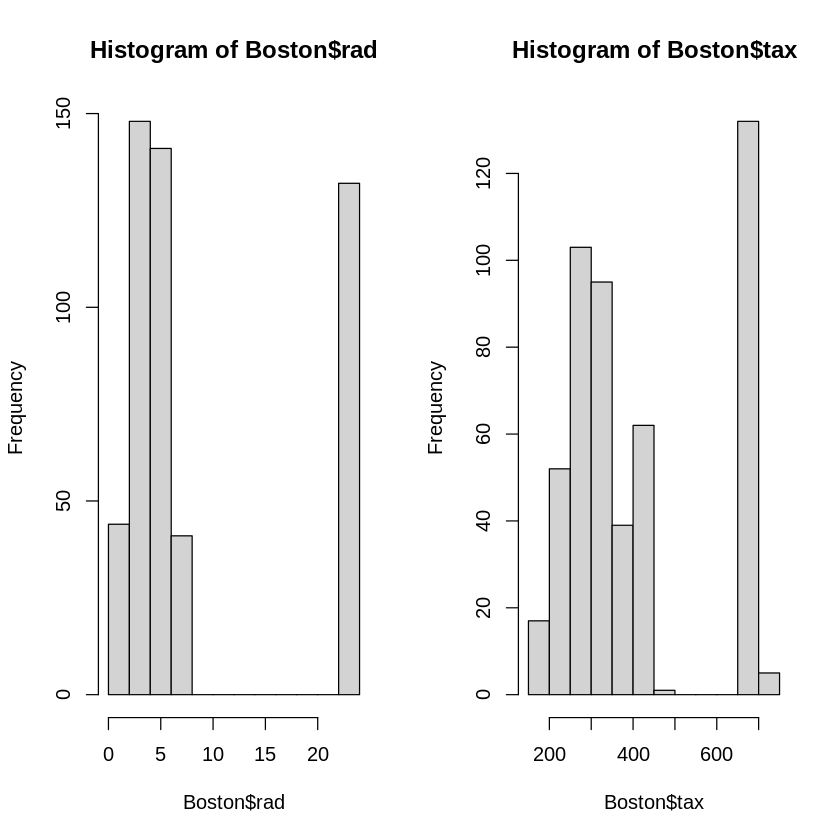

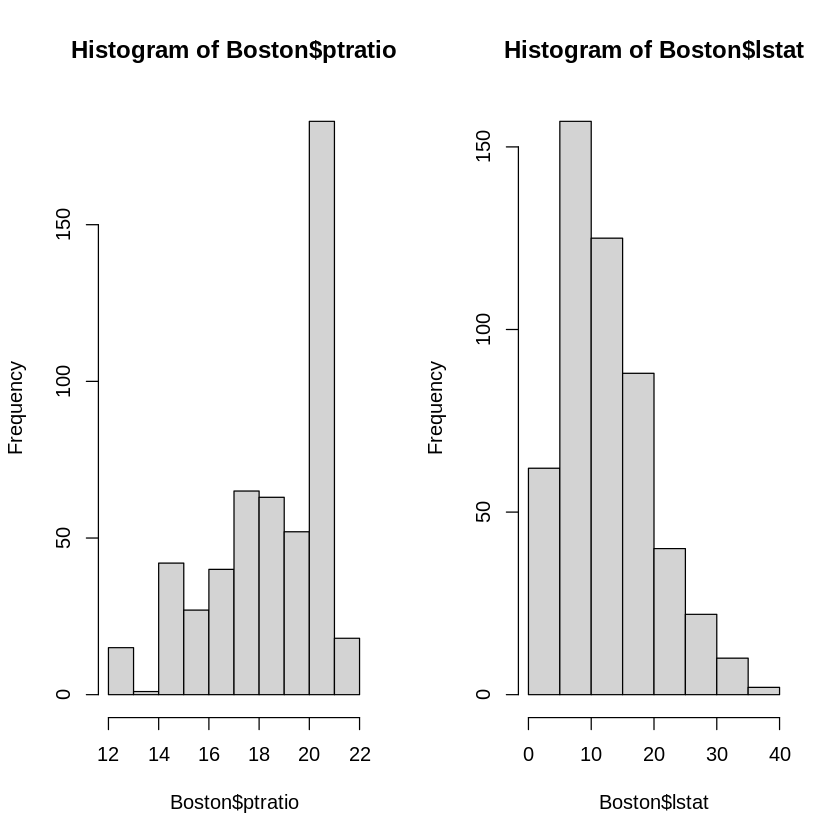

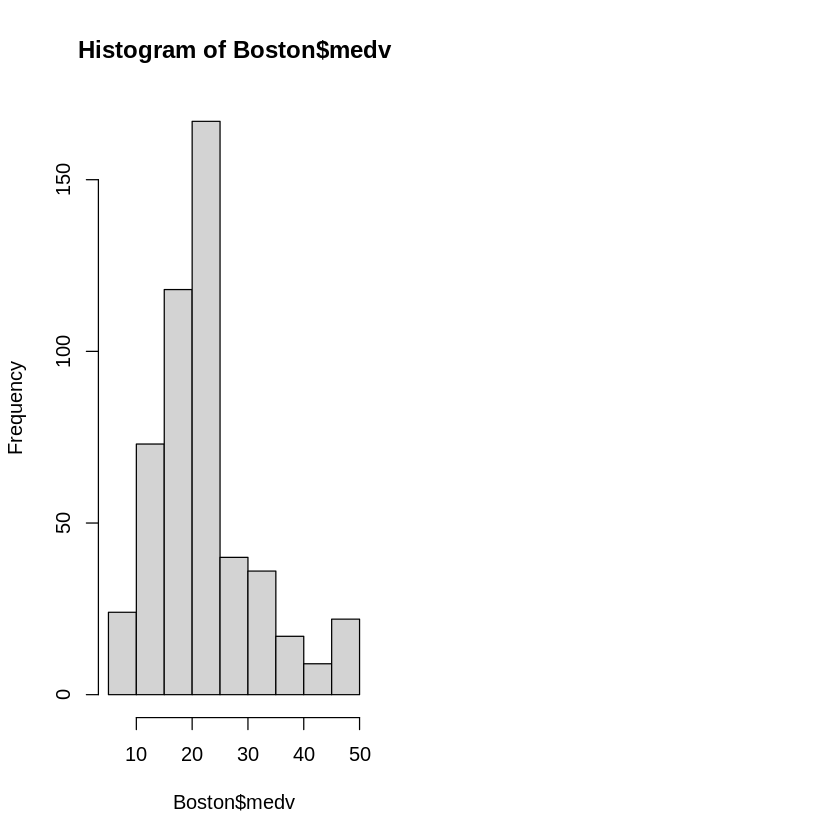

In [7]:
# 데이터 분포 확인해보기 (히스토그램)

par(mfrow=c(1,2))
hist(Boston$crim); hist(Boston$zn); hist(Boston$indus);
hist(Boston$chas); hist(Boston$nox); hist(Boston$rm);
hist(Boston$age); hist(Boston$dis); hist(Boston$rad);
hist(Boston$tax); hist(Boston$ptratio); hist(Boston$lstat);
hist(Boston$medv);

In [8]:
# 데이터를 7:3의 비율로 Training과 Testing 값으로 랜덤하게 분리해내기
sample <- sample(c(TRUE, FALSE), nrow(Boston), replace=TRUE, prob=c(0.7,0.3))
sample

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
 [13] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [37] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [61]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [73] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [85] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
[109]  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[121]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[145]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[169]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[205]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[229]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[241]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[253]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[265]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[277] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[289] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE
[301]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[313] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[325]  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[337] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[349] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[361]  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
[373]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
[385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
[397] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[433]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[445]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE
[457] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
[469] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[481] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE
[493] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
[505]  TRUE FALSE

In [9]:
train  <- Boston[sample, ]
test   <- Boston[!sample, ]

# 훈련데이터와 타겟데이터 구분하기 (데이터 형식이 data.frame에서 matrix 형태로 변형되어야 함)
# Training & Target 데이터로 쪼개기
Training_data <- as.matrix(train[,c(1:(ncol(train)-1))])
Training_Target_data <- as.matrix(train[,ncol(train)]) # 집값 데이터가 없으므로 단순히 마지막 컬럼(medv)을 타겟 값으로 설정하기
# Testing & Target 데이터로 쪼개기
Testing_data <- as.matrix(test[,c(1:(ncol(test)-1))])
Testing_Target_data <- as.matrix(test[,ncol(test)]) # 집값 데이터가 없으므로 단순히 마지막 컬럼(medv)을 타겟 값으로 설정하기

# 결측값등은 일단 0으로 치환
Training_data[is.na(Training_data)] <- 0
Training_Target_data[is.na(Training_Target_data)] <- 0
Testing_data[is.na(Testing_data)] <- 0
Testing_Target_data[is.na(Testing_Target_data)] <- 0

In [10]:
# 바뀐 데이터 형식 윗줄 몇개만 확인해보기
head(Training_data)

crim    zn   indus chas nox   rm    age  dis    rad tax ptratio lstat
[1,] 0.00632 18.0 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3     4.98
[2,] 0.02731  0.0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8     9.14
[3,] 0.02729  0.0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8     4.03
[4,] 0.03237  0.0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7     2.94
[5,] 0.06905  0.0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7     5.33
[6,] 0.14455 12.5 7.87  0    0.524 6.172 96.1 5.9505 5   311 15.2    19.15

In [17]:
rf_out <-randomForest(x=Training_data, y=Training_Target_data,
        ntree=980, replace=FALSE, samplesize=ceiling(.632*nrow(Training_data)),
        importance=TRUE, do.trace=TRUE, keep.forest=TRUE)

ERROR: ignored

In [18]:
"""
필요한 함수들을 불러오기:
keras & tensorflow - mnist 예제 데이터를 위한 라이브러리 (대체 가능),
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기,
sklearn - Random Forest, partial dependencd, 추가 데이터
등...
"""

from sklearn.datasets import fetch_openml
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn.inspection import plot_partial_dependence >> scikit-learn 업데이트로 PartialDependenceDisplay 로 바뀜(아랫줄)
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error # 오차계산을 위한 함수 평균제곱오차(MSE)
from sklearn import preprocessing

from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset 1
#from sklearn.datasets import load_boston # calling dataset 2
"""
>>> Boston 데이터를 더이상 활용할 수없게 되어 샘플을 활용
이곳의 데이터 중 'housing.zip' 파일을 내려받기하여 활용요망
housing.zip 파일 위치:  https://github.com/ycanns/DeepLearning_Class_NRC/tree/master/data
"""

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ERROR: ignored

In [1]:
"""
필요한 함수들을 불러오기:
keras - 신경망 계산 가속화,
tensorflow - 벡터행렬 및 미분 계산,
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기
"""
# 필요한 함수 불러오기
from keras.models import Sequential # ANNs model
from keras.layers import SimpleRNN, Dense # fully-connected layer with activation function
from sklearn.preprocessing import StandardScaler # library for using Normalization
from sklearn.metrics import mean_squared_error # 오차계산을 위한 함수 평균제곱오차(MSE)
from sklearn.model_selection import train_test_split # 데이터의 훈련과 검증 데이터로 구분
from tensorflow.keras import layers, models # 아키텍처 시각화를 위한 모듈
from tensorflow import keras # tensorflow + keras

import math # 수학계산 라이브러리
import numpy as np # 복잡한 산술계산
import matplotlib.pyplot as plt # 그래프 그리기
import pandas as pd # 매트릭스 등의 계산을 위한 라이브러리

In [2]:
"""
필요한 함수들을 불러오기:
keras - 신경망 계산 가속화,
tensorflow - 벡터행렬 및 미분 계산,
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기
"""
# 필요한 함수 불러오기
from keras.models import Sequential # ANNs model
from keras.layers import SimpleRNN, Dense # fully-connected layer with activation function
from sklearn.preprocessing import StandardScaler # library for using Normalization
from sklearn.metrics import mean_squared_error # 오차계산을 위한 함수 평균제곱오차(MSE)
from sklearn.model_selection import train_test_split # 데이터의 훈련과 검증 데이터로 구분
from tensorflow.keras import layers, models # 아키텍처 시각화를 위한 모듈
from tensorflow import keras # tensorflow + keras

import math # 수학계산 라이브러리
import numpy as np # 복잡한 산술계산
import matplotlib.pyplot as plt # 그래프 그리기
import pandas as pd # 매트릭스 등의 계산을 위한 라이브러리

In [3]:
# 깃허브에 있는 데이터를 임시적으로 다운로드
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = pd.read_csv('/content/deeplearning/corona_daily.csv', engine='python', skipfooter=3)
"""
pd.read_csv 와 read_csv의 차이?
from pandas import read_csv
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
"""
dataframe

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), done.


Date  Inspected  Negative  Confirmed  Recovered  Deaths
0    2020-02-06       1352      1001         24          2       0
1    2020-02-07       2097      1134         24          2       0
2    2020-02-08       2598      1683         27          3       0
3    2020-02-09       3110      2552         27          3       0
4    2020-02-10       4325      3535         28          4       0
..          ...        ...       ...        ...        ...     ...
107  2020-05-23     820289    788766      11190      10213     266
108  2020-05-24     826437    796142      11206      10226     267
109  2020-05-25     839475    806206      11225      10275     269
110  2020-05-26     852876    820550      11265      10295     269
111  2020-05-27     868666    834952      11344      10340     269

[112 rows x 6 columns]

In [4]:
dataframe.describe()

Inspected      Negative     Confirmed     Recovered      Deaths
count     112.000000     112.00000    112.000000    112.000000  112.000000
mean   402732.258929  380693.06250   7841.169643   4984.607143  147.044643
std    265883.064283  260758.89632   4052.162530   4088.498443  103.033922
min      1352.000000    1001.00000     24.000000      2.000000    0.000000
25%    160190.250000  132209.25000   6154.500000    103.000000   40.250000
50%    437508.000000  409092.50000  10019.000000   5924.500000  171.500000
75%    620678.000000  601264.00000  10767.250000   9062.250000  247.250000
max    868666.000000  834952.00000  11344.000000  10340.000000  269.000000

<ipython-input-5-013288e3a8be>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Inspected'], hist=True, kde=False,


Text(0, 0.5, 'counts')

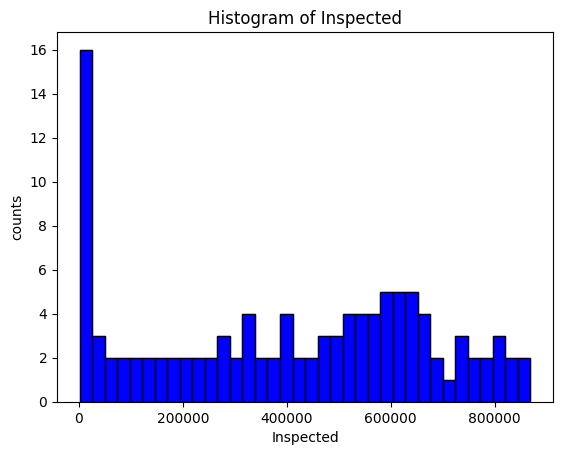

In [5]:
import seaborn as sns

# matplotlib histogram
plt.hist(dataframe['Inspected'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(dataframe['Inspected'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Inspected')
plt.xlabel('Inspected')
plt.ylabel('counts')

In [6]:
dataframe.columns

Index(['Date', 'Inspected', 'Negative', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

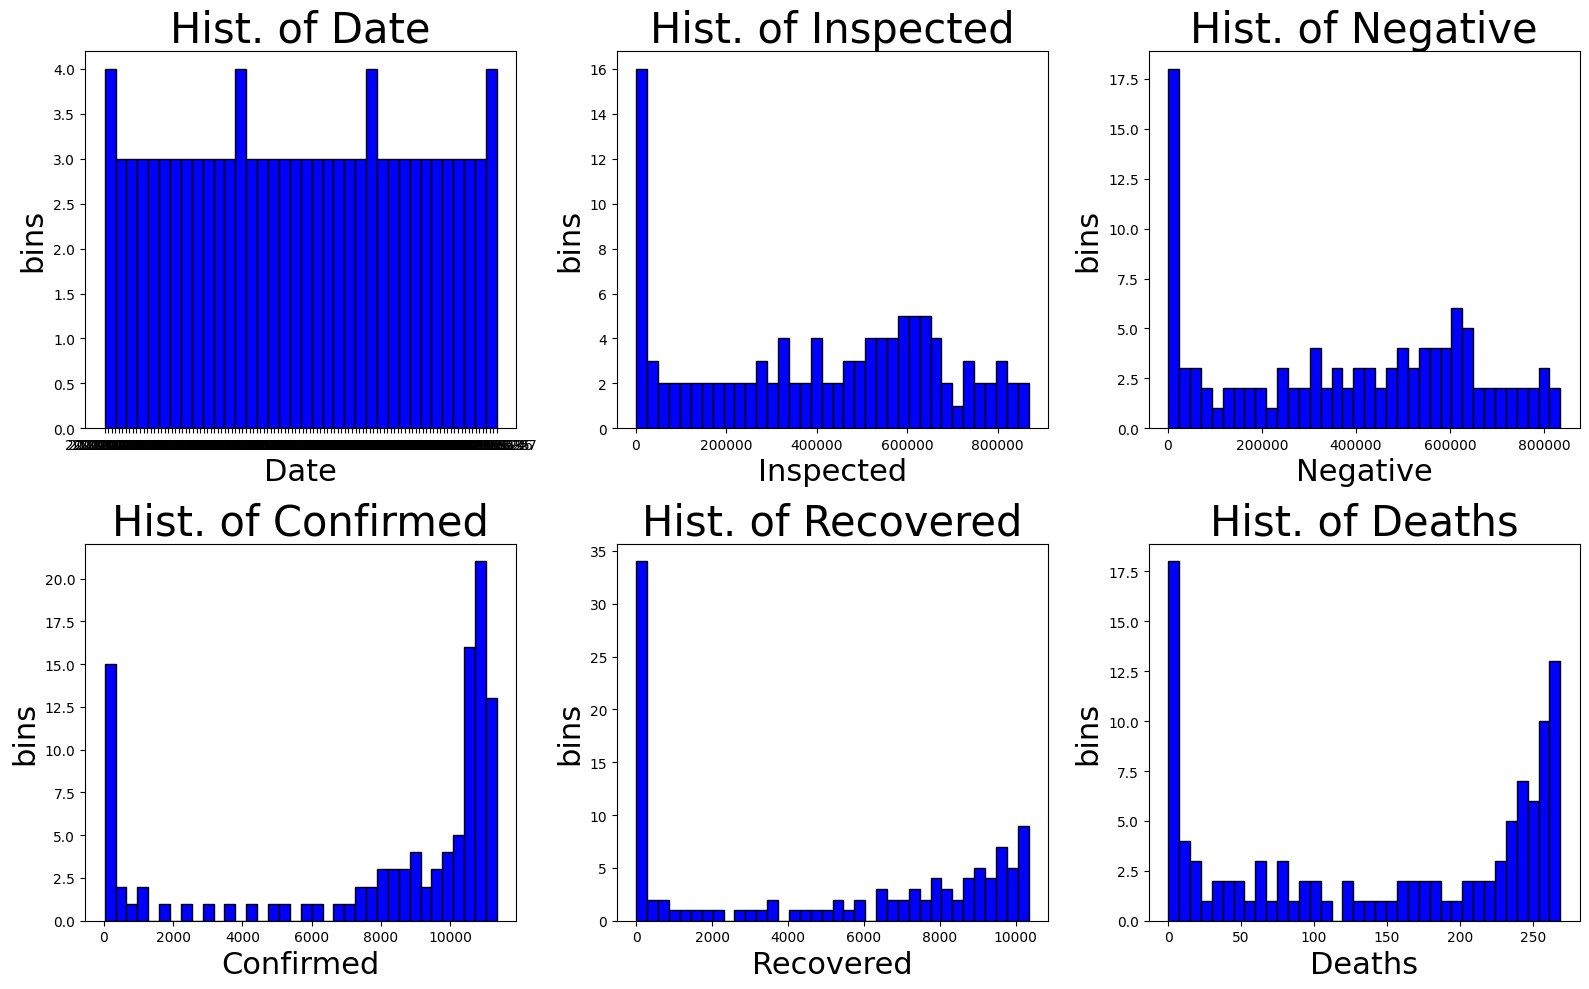

In [7]:
# Show 4 different binwidths
i = 0
plt.figure(figsize = (16, 10))
for value_in_pd in dataframe.columns:

    # Set up the plot
    ax = plt.subplot(2, 3, i + 1)

    # Draw the plot
    ax.hist(dataframe[value_in_pd], bins = int(180/5),
             color = 'blue', edgecolor = 'black')

    # Title and labels
    ax.set_title('Hist. of %s' % value_in_pd, size = 30)
    ax.set_xlabel('%s' % value_in_pd, size = 22)
    ax.set_ylabel('bins', size= 22)
    i += 1
plt.tight_layout()
plt.show()

<ipython-input-8-57c4d1a8befc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Inspected'], hist=True, kde=True,


<Axes: xlabel='Inspected', ylabel='Density'>

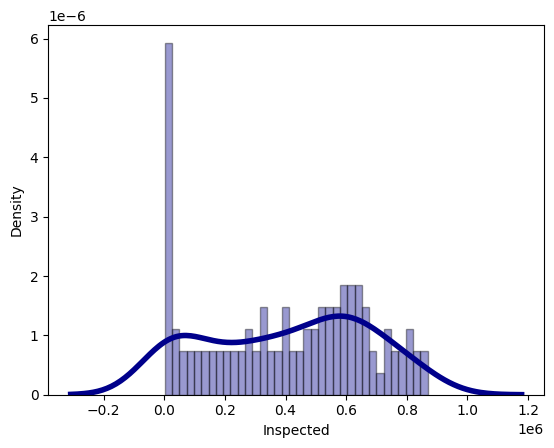

In [8]:
# Density Plot and Histogram of all arrival delays
sns.distplot(dataframe['Inspected'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<ipython-input-9-bf95b0a73fa2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Inspected'], hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Inspected', ylabel='Density'>

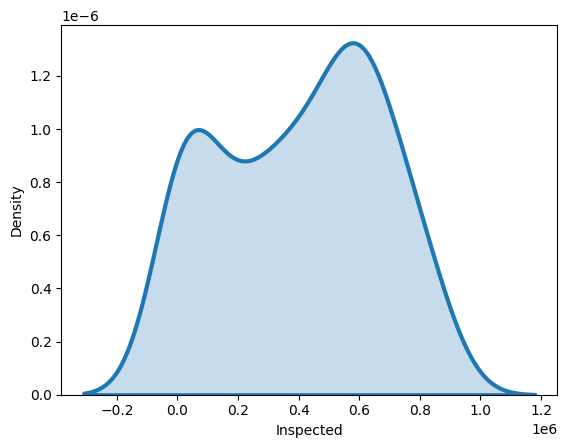

In [9]:
sns.distplot(dataframe['Inspected'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             label = value_in_pd)

In [10]:
dataframe.columns[1:len(dataframe.columns)]

Index(['Inspected', 'Negative', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

<ipython-input-11-0cf10fee70bc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[value_in_pd], hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-11-0cf10fee70bc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

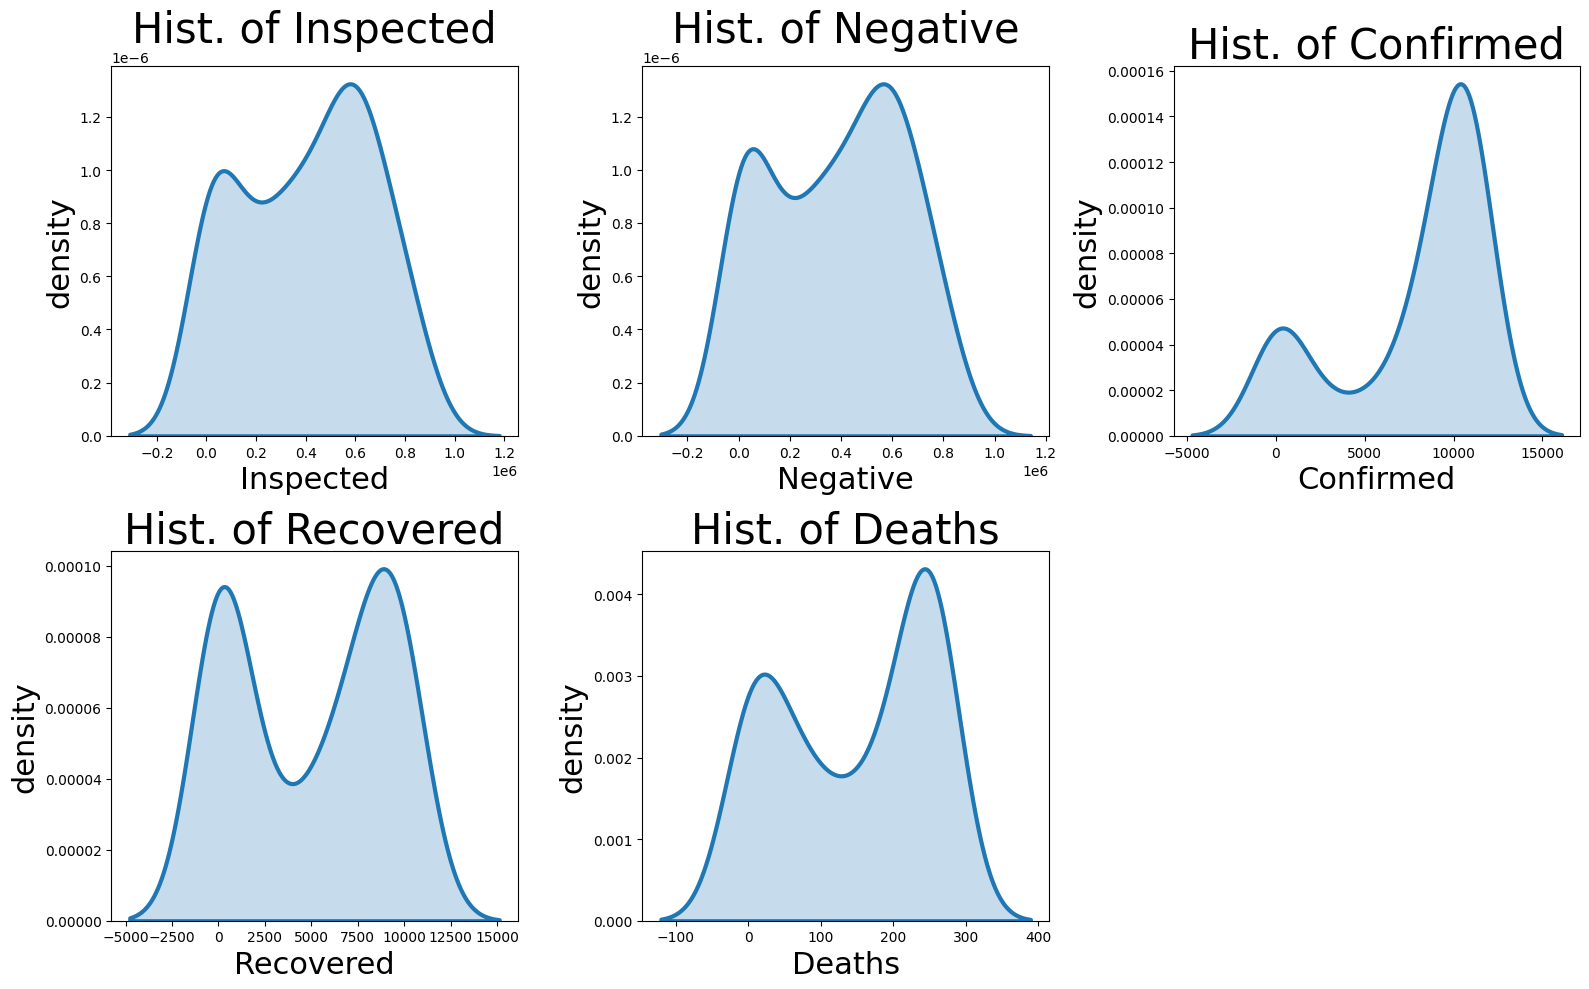

In [11]:
# Show 4 different binwidths
i = 0
plt.figure(figsize = (16, 10))
for value_in_pd in dataframe.columns[1:len(dataframe.columns)]:

    # Set up the plot
    ax = plt.subplot(2, 3, i + 1)

    # Draw the plot
    sns.distplot(dataframe[value_in_pd], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = value_in_pd)

    # Title and labels
    ax.set_title('Hist. of %s' % value_in_pd, size = 30)
    ax.set_xlabel('%s' % value_in_pd, size = 22)
    ax.set_ylabel('density', size= 22)
    i += 1
plt.tight_layout()
plt.show()

In [12]:
dataframe['Date'].head()

0    2020-02-06
1    2020-02-07
2    2020-02-08
3    2020-02-09
4    2020-02-10
Name: Date, dtype: object

In [13]:
#개별 값의 치환
'2020-02-06'.replace("-", "")

'20200206'

In [14]:
# Date format에 '-' 없애기
dataframe['Date'] = dataframe['Date'].replace('-','', regex=True)
dataframe

Date  Inspected  Negative  Confirmed  Recovered  Deaths
0    20200206       1352      1001         24          2       0
1    20200207       2097      1134         24          2       0
2    20200208       2598      1683         27          3       0
3    20200209       3110      2552         27          3       0
4    20200210       4325      3535         28          4       0
..        ...        ...       ...        ...        ...     ...
107  20200523     820289    788766      11190      10213     266
108  20200524     826437    796142      11206      10226     267
109  20200525     839475    806206      11225      10275     269
110  20200526     852876    820550      11265      10295     269
111  20200527     868666    834952      11344      10340     269

[112 rows x 6 columns]

In [15]:
# data의 컬럼순서 바꾸기
dataframe = dataframe[['Date', 'Inspected', 'Negative', 'Recovered', 'Deaths', 'Confirmed']]
dataframe

Date  Inspected  Negative  Recovered  Deaths  Confirmed
0    20200206       1352      1001          2       0         24
1    20200207       2097      1134          2       0         24
2    20200208       2598      1683          3       0         27
3    20200209       3110      2552          3       0         27
4    20200210       4325      3535          4       0         28
..        ...        ...       ...        ...     ...        ...
107  20200523     820289    788766      10213     266      11190
108  20200524     826437    796142      10226     267      11206
109  20200525     839475    806206      10275     269      11225
110  20200526     852876    820550      10295     269      11265
111  20200527     868666    834952      10340     269      11344

[112 rows x 6 columns]

In [16]:
dataframe['Confirmed']

0         24
1         24
2         27
3         27
4         28
       ...  
107    11190
108    11206
109    11225
110    11265
111    11344
Name: Confirmed, Length: 112, dtype: int64

In [17]:
dataframe.iloc[:, 0:(dataframe.shape[1]-1)]

Date  Inspected  Negative  Recovered  Deaths
0    20200206       1352      1001          2       0
1    20200207       2097      1134          2       0
2    20200208       2598      1683          3       0
3    20200209       3110      2552          3       0
4    20200210       4325      3535          4       0
..        ...        ...       ...        ...     ...
107  20200523     820289    788766      10213     266
108  20200524     826437    796142      10226     267
109  20200525     839475    806206      10275     269
110  20200526     852876    820550      10295     269
111  20200527     868666    834952      10340     269

[112 rows x 5 columns]

In [18]:
x_dataset = dataframe.iloc[:, 0:(dataframe.shape[1]-1)].astype('float32')
y_dataset = dataframe[['Confirmed']].astype('float32')
print(x_dataset)
print(y_dataset)

           Date  Inspected  Negative  Recovered  Deaths
0    20200206.0     1352.0    1001.0        2.0     0.0
1    20200208.0     2097.0    1134.0        2.0     0.0
2    20200208.0     2598.0    1683.0        3.0     0.0
3    20200208.0     3110.0    2552.0        3.0     0.0
4    20200210.0     4325.0    3535.0        4.0     0.0
..          ...        ...       ...        ...     ...
107  20200524.0   820289.0  788766.0    10213.0   266.0
108  20200524.0   826437.0  796142.0    10226.0   267.0
109  20200524.0   839475.0  806206.0    10275.0   269.0
110  20200526.0   852876.0  820550.0    10295.0   269.0
111  20200528.0   868666.0  834952.0    10340.0   269.0

[112 rows x 5 columns]
     Confirmed
0         24.0
1         24.0
2         27.0
3         27.0
4         28.0
..         ...
107    11190.0
108    11206.0
109    11225.0
110    11265.0
111    11344.0

[112 rows x 1 columns]


In [19]:
sc_x = StandardScaler()
X_Dataset = sc_x.fit_transform(x_dataset) # 데이터 정규화 변환 (sc_x 는 training)
print(X_Dataset.shape)
X_Dataset

(112, 5)


array([[-1.5284351 , -1.5163968 , -1.4626483 , -1.224166  , -1.4335622 ],
       [-1.509712  , -1.5135822 , -1.4621359 , -1.224166  , -1.4335622 ],
       [-1.509712  , -1.5116894 , -1.4600211 , -1.2239203 , -1.4335622 ],
       [-1.509712  , -1.5097551 , -1.4566735 , -1.2239203 , -1.4335622 ],
       [-1.490989  , -1.5051649 , -1.4528868 , -1.2236747 , -1.4335622 ],
       [-1.472266  , -1.5002574 , -1.4479715 , -1.2229376 , -1.4335622 ],
       [-1.472266  , -1.4969063 , -1.4436954 , -1.2229376 , -1.4335622 ],
       [-1.472266  , -1.4941446 , -1.4407755 , -1.2229376 , -1.4335622 ],
       [-1.453543  , -1.4922858 , -1.4389688 , -1.2224462 , -1.4335622 ],
       [-1.4348198 , -1.4906727 , -1.4370466 , -1.2224462 , -1.4335622 ],
       [-1.4348198 , -1.4885683 , -1.4357638 , -1.2222005 , -1.4335622 ],
       [-1.4348198 , -1.4845864 , -1.4321312 , -1.2217091 , -1.4335622 ],
       [-1.4160968 , -1.4792935 , -1.4280864 , -1.2207264 , -1.4335622 ],
       [-1.3973738 , -1.471628  , -1.4

In [20]:
sc_y = StandardScaler()
Y_Dataset = sc_y.fit_transform(y_dataset) # 데이터 정규화 변환 (sc_y 는 target)
print(Y_Dataset.shape)
Y_Dataset

(112, 1)


array([[-1.9378055 ],
       [-1.9378055 ],
       [-1.9370619 ],
       [-1.9370619 ],
       [-1.936814  ],
       [-1.936814  ],
       [-1.936814  ],
       [-1.936814  ],
       [-1.936814  ],
       [-1.9365661 ],
       [-1.9363182 ],
       [-1.9360703 ],
       [-1.9311125 ],
       [-1.9179742 ],
       [-1.8931851 ],
       [-1.8364182 ],
       [-1.7945246 ],
       [-1.7372618 ],
       [-1.7015655 ],
       [-1.6311644 ],
       [-1.5059795 ],
       [-1.3644338 ],
       [-1.1628984 ],
       [-1.0176344 ],
       [-0.8996383 ],
       [-0.7509037 ],
       [-0.62299204],
       [-0.5144158 ],
       [-0.38600826],
       [-0.26627693],
       [-0.17530094],
       [-0.11382399],
       [-0.08135028],
       [-0.02136067],
       [ 0.00689889],
       [ 0.03416689],
       [ 0.06069123],
       [ 0.07953094],
       [ 0.09787487],
       [ 0.11869771],
       [ 0.14175157],
       [ 0.17943099],
       [ 0.20099752],
       [ 0.23743749],
       [ 0.2617308 ],
       [ 0

In [21]:
Train_ratio = math.ceil(len(X_Dataset)*0.75)

In [22]:
X_train = X_Dataset[0:Train_ratio,]
Y_train = Y_Dataset[0:Train_ratio,]
X_test = X_Dataset[(Train_ratio+1):len(X_Dataset),]
Y_test = Y_Dataset[(Train_ratio+1):len(X_Dataset),]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape) # 훈련데이터와 검증데이터의 크기 확인

(84, 5) (84, 1) (27, 5) (27, 1)


In [23]:
# 데이터의 변환을 위한 함수생성: RNN의 데이터포맷으로 변환
def create_dataset(X_dataset, Y_dataset, look_back=3):
  x_data = []
  y_data = []
  for i in range(len(X_dataset)-look_back-1):
    x_data.append(X_dataset[i:(i+look_back)])
    y_data.append(Y_dataset[i + look_back][0])
  return np.array(x_data), np.array(y_data)

In [24]:
look_back = 3 # 3개의 이전 데이터 (Look back)
x_train, y_train = create_dataset(X_train, Y_train, look_back)
x_test, y_test = create_dataset(X_test, Y_test, look_back)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80, 3, 5) (80,)
(23, 3, 5) (23,)


In [25]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[2], x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[2], x_test.shape[1]))

print(X_train.shape)
print(X_test.shape)

(80, 5, 3)
(23, 5, 3)


In [26]:
print(x_train)

[[[-1.5284351  -1.5163968  -1.4626483  -1.224166   -1.4335622 ]
  [-1.509712   -1.5135822  -1.4621359  -1.224166   -1.4335622 ]
  [-1.509712   -1.5116894  -1.4600211  -1.2239203  -1.4335622 ]]

 [[-1.509712   -1.5135822  -1.4621359  -1.224166   -1.4335622 ]
  [-1.509712   -1.5116894  -1.4600211  -1.2239203  -1.4335622 ]
  [-1.509712   -1.5097551  -1.4566735  -1.2239203  -1.4335622 ]]

 [[-1.509712   -1.5116894  -1.4600211  -1.2239203  -1.4335622 ]
  [-1.509712   -1.5097551  -1.4566735  -1.2239203  -1.4335622 ]
  [-1.490989   -1.5051649  -1.4528868  -1.2236747  -1.4335622 ]]

 ...

 [[ 0.512376    0.7056758   0.7262119   0.863935    0.9062369 ]
  [ 0.512376    0.7269872   0.7492172   0.8968572   0.9062369 ]
  [ 0.512376    0.73878956  0.76221454  0.9170036   0.9257352 ]]

 [[ 0.512376    0.7269872   0.7492172   0.8968572   0.9062369 ]
  [ 0.512376    0.73878956  0.76221454  0.9170036   0.9257352 ]
  [ 0.531099    0.7515401   0.7755778   0.9285509   0.93548435]]

 [[ 0.512376    0.738789

In [27]:
# 변수를 지우고 싶을때..
# del (model)

In [28]:
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(look_back, x_train.shape[2]))) # 3개의 뉴런
model.add(Dense(1, activation="linear")) # 1단위의 확진자 수 예측
model.compile(loss='mse', optimizer='sgd') # 손실함수 및 오차를 줄이기 위한 방법 (adam 또는 확률적경사하강법(SGD))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 27        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


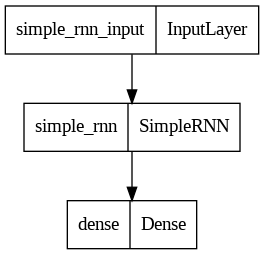

In [29]:
# Simple Architecture
keras.utils.plot_model(model)

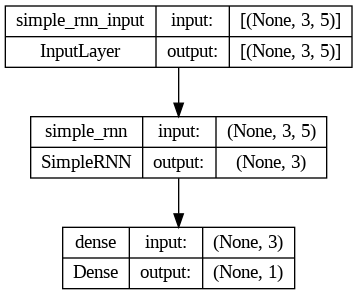

In [30]:
# Architecture with variables
keras.utils.plot_model(model, show_shapes=True)

In [31]:
model.fit(x_train, y_train, epochs=30000, batch_size=1, verbose=1)

80/80 [==============================] - 0s 4ms/step - loss: 2.1224e-04
Epoch 4521/30000
80/80 [==============================] - 0s 5ms/step - loss: 2.2098e-04
Epoch 4522/30000
80/80 [==============================] - 0s 4ms/step - loss: 2.1377e-04
Epoch 4523/30000
80/80 [==============================] - 0s 4ms/step - loss: 1.7472e-04
Epoch 4524/30000
80/80 [==============================] - 0s 4ms/step - loss: 2.2447e-04
Epoch 4525/30000
80/80 [==============================] - 0s 5ms/step - loss: 1.6960e-04
Epoch 4526/30000
80/80 [==============================] - 0s 4ms/step - loss: 1.7854e-04
Epoch 4527/30000
80/80 [==============================] - 0s 4ms/step - loss: 2.5428e-04
Epoch 4528/30000
80/80 [==============================] - 0s 4ms/step - loss: 1.9777e-04
Epoch 4529/30000
80/80 [==============================] - 0s 4ms/step - loss: 2.0525e-04
Epoch 4530/30000
80/80 [==============================] - 0s 4ms/step - loss: 2.1346e-04
Epoch 4531/30000
80/80 [==============

KeyboardInterrupt: ignored

In [8]:
! pip install cartoframes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for carto: filename=carto-1.11.3-py3-none-any.whl size=35061 sha256=f713aa99b9236fe5c0bb94a1cdbc93b1063ef9b279627b90a45f7cc4369e07cf
  Stored in directory: /root/.cache/pip/wheels/e6/be/cf/60b6f10a00062e2450007ad9d1681e4e0179a87094283b2da0
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-py3-none-any.whl size=8475 sha256=ce85110b216da4a1d57f636c5bb848286e15c704d41ab298c1caa4bbcfad3dba
  Stored in directory: /root/.cache/pip/wheels/47/ad/ed/ac848188f432e598d5081d8345532f351085257941b5de0ee5
Successfully built carto pyrestcli
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
 

In [9]:
import pandas as pd
import geopandas as gpd
from cartoframes.viz import Layer, color_category_style
import numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
import hdbscan
import folium
import re

In [10]:
# https://www.localdata.go.kr/devcenter/dataDown.do?menuNo=20001
# 필요한 파일 업로드 기능 (구글 코랩)
from google.colab import files
uploaded = files.upload()

Saving 01_01_01_P.xlsx to 01_01_01_P (2).xlsx


In [14]:
sample_data = pd.read_excel('01_01_01_P.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
sample_data

번호 개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호  \
0        1     병원  01_01_01_P   3000000  PHMA220213000034021200001   
1        2     병원  01_01_01_P   3000000  PHMA219663000034021200001   
2        3     병원  01_01_01_P   3000000  PHMA219773000034021200001   
3        4     병원  01_01_01_P   3000000  PHMA220223000034021200001   
4        5     병원  01_01_01_P   3000000  PHMA219893000034021200002   
...    ...    ...         ...       ...                        ...   
8190  8191     병원  01_01_01_P   6530000         201364200002000003   
8191  8192     병원  01_01_01_P   6530000         201364200002000005   
8192  8193     병원  01_01_01_P   6530000         200664200002000005   
8193  8194     병원  01_01_01_P   6530000         200664200002000007   
8194  8195     병원  01_01_01_P   6530000         201064200002000007   

           인허가일자  인허가취소일자  영업상태구분코드  영업상태명 상세영업상태코드  ... 지정취소일자 완화의료지정형태  \
0     2021-05-27      NaN         1  영업/정상       13  ...    NaN      NaN   
1     1966-01-19      NaN         3     폐업       03  ...    NaN      NaN   
2     1977-04-01      NaN         1  영업/정상       13  ...    NaN      NaN   
3     2022-04-27      NaN         1  영업/정상       13  ...    NaN      NaN   
4     1989-10-12      NaN         1  영업/정상       13  ...    NaN      NaN   
...          ...      ...       ...    ...      ...  ...    ...      ...   
8190  2013-05-22      NaN         3     폐업        3  ...    NaN      NaN   
8191  2013-07-09      NaN         3     폐업        3  ...    NaN      NaN   
8192  2006-08-16      NaN         3     폐업        3  ...    NaN      NaN   
8193  2006-11-28      NaN         3     폐업        3  ...    NaN      NaN   
8194  2010-12-02      NaN         3     폐업        3  ...    NaN      NaN   

     완화의료담당부서명 구급차특수  구급차일반 총인원  구조사수 허가병상수 최초지정일자 관리주체  
0          NaN   0.0    0.0 NaN   NaN   0.0    NaN  시군구  
1          NaN   0.0    0.0 NaN   NaN   0.0    NaN  시군구  
2          NaN   0.0    0.0 NaN   NaN   0.0    NaN  시군구  
3          NaN   0.0    0.0 NaN   NaN   0.0    NaN  시군구  
4          NaN   0.0    0.0 NaN   NaN   0.0    NaN  시군구  
...        ...   ...    ...  ..   ...   ...    ...  ...  
8190       NaN   0.0    0.0 NaN   NaN   0.0    NaN   시도  
8191       NaN   0.0    0.0 NaN   NaN   0.0    NaN   시도  
8192       NaN   0.0    0.0 NaN   NaN   0.0    NaN   시도  
8193       NaN   0.0    0.0 NaN   NaN   0.0    NaN   시도  
8194       NaN   0.0    0.0 NaN   NaN   0.0    NaN   시도  

[8195 rows x 45 columns]

In [16]:
sample_data.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '관리주체'],
      dtype='object')

In [17]:
# remove NA or empty values
sample_data = sample_data[(sample_data['좌표정보(X)'] == sample_data['좌표정보(X)']) & (sample_data['좌표정보(Y)'] == sample_data['좌표정보(Y)'])].copy()

In [18]:
sample_data['좌표정보(X)'] = sample_data['좌표정보(X)'].astype(float)
sample_data['좌표정보(Y)'] = sample_data['좌표정보(Y)'].astype(float)

In [19]:
# Coordinate change
sample_data_xy = gpd.GeoDataFrame(
    sample_data, geometry=gpd.points_from_xy(x=sample_data['좌표정보(X)'], y=sample_data['좌표정보(Y)'])
)
sample_data_xy.crs = "+proj=tmerc +lat_0=38 +lon_0=127.0028902777778 +k=1 +x_0=200000 +y_0=500000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43"
sample_data_xy = sample_data_xy.to_crs('EPSG:4326')

In [20]:
sample_data_xy

번호 개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호  \
0        1     병원  01_01_01_P   3000000  PHMA220213000034021200001   
2        3     병원  01_01_01_P   3000000  PHMA219773000034021200001   
3        4     병원  01_01_01_P   3000000  PHMA220223000034021200001   
4        5     병원  01_01_01_P   3000000  PHMA219893000034021200002   
5        6     병원  01_01_01_P   3000000  PHMA220123000034021200001   
...    ...    ...         ...       ...                        ...   
8190  8191     병원  01_01_01_P   6530000         201364200002000003   
8191  8192     병원  01_01_01_P   6530000         201364200002000005   
8192  8193     병원  01_01_01_P   6530000         200664200002000005   
8193  8194     병원  01_01_01_P   6530000         200664200002000007   
8194  8195     병원  01_01_01_P   6530000         201064200002000007   

           인허가일자  인허가취소일자  영업상태구분코드  영업상태명 상세영업상태코드  ... 완화의료지정형태 완화의료담당부서명  \
0     2021-05-27      NaN         1  영업/정상       13  ...      NaN       NaN   
2     1977-04-01      NaN         1  영업/정상       13  ...      NaN       NaN   
3     2022-04-27      NaN         1  영업/정상       13  ...      NaN       NaN   
4     1989-10-12      NaN         1  영업/정상       13  ...      NaN       NaN   
5     2012-05-16      NaN         1  영업/정상       13  ...      NaN       NaN   
...          ...      ...       ...    ...      ...  ...      ...       ...   
8190  2013-05-22      NaN         3     폐업        3  ...      NaN       NaN   
8191  2013-07-09      NaN         3     폐업        3  ...      NaN       NaN   
8192  2006-08-16      NaN         3     폐업        3  ...      NaN       NaN   
8193  2006-11-28      NaN         3     폐업        3  ...      NaN       NaN   
8194  2010-12-02      NaN         3     폐업        3  ...      NaN       NaN   

     구급차특수 구급차일반  총인원 구조사수  허가병상수 최초지정일자 관리주체                    geometry  
0      0.0   0.0  NaN  NaN    0.0    NaN  시군구  POINT (126.97102 37.57226)  
2      0.0   0.0  NaN  NaN    0.0    NaN  시군구  POINT (126.96698 37.56739)  
3      0.0   0.0  NaN  NaN    0.0    NaN  시군구  POINT (127.00180 37.57917)  
4      0.0   0.0  NaN  NaN    0.0    NaN  시군구  POINT (126.98286 37.58806)  
5      0.0   0.0  NaN  NaN    0.0    NaN  시군구  POINT (126.96922 37.60682)  
...    ...   ...  ...  ...    ...    ...  ...                         ...  
8190   0.0   0.0  NaN  NaN    0.0    NaN   시도  POINT (128.34554 37.94456)  
8191   0.0   0.0  NaN  NaN    0.0    NaN   시도  POINT (127.98462 37.39365)  
8192   0.0   0.0  NaN  NaN    0.0    NaN   시도  POINT (127.94613 37.35377)  
8193   0.0   0.0  NaN  NaN    0.0    NaN   시도  POINT (129.03768 37.61205)  
8194   0.0   0.0  NaN  NaN    0.0    NaN   시도  POINT (127.69661 37.98238)  

[7403 rows x 46 columns]

In [21]:
# 영업상태명으로 시각화 하기
Layer(sample_data_xy.sample(frac=1).iloc[:2000], color_category_style('영업상태명'))

In [22]:
sample_data_xy.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '관리주체', 'geometry'],
      dtype='object')

In [23]:
sample_data_xy['lon'] = sample_data_xy.geometry.x
sample_data_xy['lat'] = sample_data_xy.geometry.y
sample_data['lon'] = sample_data_xy.geometry.x
sample_data['lat'] = sample_data_xy.geometry.y
coords = sample_data_xy[['lat', 'lon']].to_numpy()

In [24]:
coords

array([[ 37.57226208, 126.97101616],
       [ 37.56738827, 126.96698364],
       [ 37.57917301, 127.00179558],
       ...,
       [ 37.35377438, 127.94613331],
       [ 37.61205406, 129.03768341],
       [ 37.98237519, 127.6966069 ]])

In [25]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 833


In [26]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [27]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [28]:
rs = rep_points.apply(lambda row: sample_data_xy[(sample_data_xy['lat']==row['lat']) & (sample_data_xy['lon']==row['lon'])].iloc[0], axis=1)

In [29]:
rs.head

<bound method NDFrame.head of        번호 개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0      94     병원  01_01_01_P   3050000  PHMA219713050034021200001  1971-08-21   
1       5     병원  01_01_01_P   3000000  PHMA219893000034021200002  1989-10-12   
2       6     병원  01_01_01_P   3000000  PHMA220123000034021200001  2012-05-16   
3      34     병원  01_01_01_P   3020000  PHMA219783020033021200001  1978-02-23   
4      35     병원  01_01_01_P   3020000  PHMA219843020033021200001  1984-04-03   
..    ...    ...         ...       ...                        ...         ...   
828  8114     병원  01_01_01_P   6530000         201064200002000006  2010-09-29   
829  8115     병원  01_01_01_P   6530000         200964200002000007  2009-10-08   
830  8118     병원  01_01_01_P   6530000         202164200002000002  2021-06-25   
831  8130     병원  01_01_01_P   6530000         200464200002000004  2004-03-23   
832  8165     병원  01_01_01_P   6530000         201364200002000006  2013-09-17  

In [30]:
vis_rs = gpd.GeoDataFrame(
    rs, geometry=gpd.points_from_xy(x=rs['lon'], y=rs['lat'])
)

In [31]:
vis_rs

번호 개방서비스명    개방서비스아이디  개방자치단체코드                       관리번호       인허가일자  \
0      94     병원  01_01_01_P   3050000  PHMA219713050034021200001  1971-08-21   
1       5     병원  01_01_01_P   3000000  PHMA219893000034021200002  1989-10-12   
2       6     병원  01_01_01_P   3000000  PHMA220123000034021200001  2012-05-16   
3      34     병원  01_01_01_P   3020000  PHMA219783020033021200001  1978-02-23   
4      35     병원  01_01_01_P   3020000  PHMA219843020033021200001  1984-04-03   
..    ...    ...         ...       ...                        ...         ...   
828  8114     병원  01_01_01_P   6530000         201064200002000006  2010-09-29   
829  8115     병원  01_01_01_P   6530000         200964200002000007  2009-10-08   
830  8118     병원  01_01_01_P   6530000         202164200002000002  2021-06-25   
831  8130     병원  01_01_01_P   6530000         200464200002000004  2004-03-23   
832  8165     병원  01_01_01_P   6530000         201364200002000006  2013-09-17   

     인허가취소일자  영업상태구분코드  영업상태명 상세영업상태코드  ... 구급차특수 구급차일반 총인원 구조사수  허가병상수  \
0        NaN         1  영업/정상       13  ...   0.0   0.0 NaN  NaN    0.0   
1        NaN         1  영업/정상       13  ...   0.0   0.0 NaN  NaN    0.0   
2        NaN         1  영업/정상       13  ...   0.0   0.0 NaN  NaN    0.0   
3        NaN         1  영업/정상       13  ...   0.0   0.0 NaN  NaN    0.0   
4        NaN         1  영업/정상       13  ...   0.0   0.0 NaN  NaN    0.0   
..       ...       ...    ...      ...  ...   ...   ...  ..  ...    ...   
828      NaN         2     휴업        2  ...   0.0   0.0 NaN  NaN    0.0   
829      NaN         1  영업/정상     BBBB  ...   0.0   0.0 NaN  NaN    0.0   
830      NaN         1  영업/정상     BBBB  ...   0.0   0.0 NaN  NaN    0.0   
831      NaN         1  영업/정상     BBBB  ...   0.0   0.0 NaN  NaN    0.0   
832      NaN         3     폐업        3  ...   0.0   0.0 NaN  NaN    0.0   

    최초지정일자  관리주체                    geometry         lon        lat  
0      NaN   시군구  POINT (127.05139 37.59671)  127.051395  37.596712  
1      NaN   시군구  POINT (126.98286 37.58806)  126.982862  37.588057  
2      NaN   시군구  POINT (126.96922 37.60682)  126.969218  37.606820  
3      NaN   시군구  POINT (127.00431 37.53371)  127.004307  37.533707  
4      NaN   시군구  POINT (126.98195 37.51761)  126.981950  37.517609  
..     ...   ...                         ...         ...        ...  
828    NaN    시도  POINT (128.01691 37.84122)  128.016910  37.841219  
829    NaN    시도  POINT (129.03523 37.17966)  129.035230  37.179660  
830    NaN    시도  POINT (127.51727 37.72448)  127.517267  37.724479  
831    NaN    시도  POINT (127.81441 37.73216)  127.814412  37.732161  
832    NaN    시도  POINT (128.82510 37.89226)  128.825095  37.892265  

[833 rows x 48 columns]

In [32]:
# Distribution for the center-most points
Layer(vis_rs.sample(frac=1).iloc[:2000], color_category_style('영업상태명'))

In [33]:
m.save ('test.html')

NameError: ignored

In [39]:
m.save ('test.html')

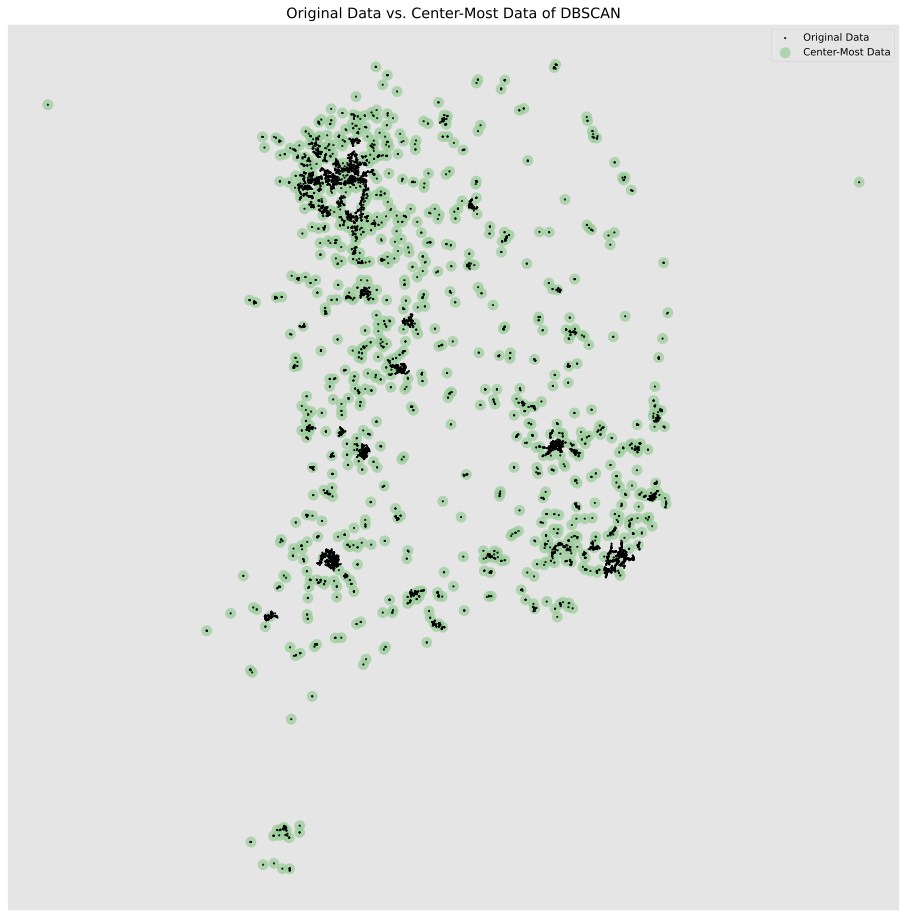

In [34]:
fig, ax = plt.subplots(figsize=[16, 16])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(sample_data['lon'], sample_data['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Original Data vs. Center-Most Data of DBSCAN')
plt.xticks([])
plt.yticks([])
ax.legend([df_scatter, rs_scatter], ['Original Data', 'Center-Most Data'], loc='upper right')
plt.show()


In [35]:
# Pre-set for color set
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
        '#000075', '#808080']*100
sns.set(style="white")

In [36]:
sample_data_xy.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '관리주체', 'geometry', 'lon', 'lat'],
      dtype='object')

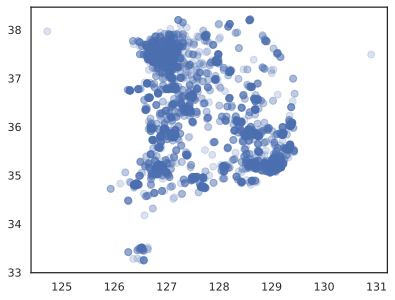

In [37]:
# Simple Visualization
X = np.array(sample_data_xy[['lon', 'lat']])
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

In [38]:
# All Data Visualization
m = folium.Map(location=[sample_data_xy.lat.mean(), sample_data_xy.lon.mean()], zoom_start=9,
               tiles='OpenStreet Map')
for _, row in sample_data_xy.iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lon],
        radius=5,
        #popup=re.sub(r'[^a-zA-Z ]+', '', row['영업상태명']),
        color='#1787FE',
        fill=True,
        fill_colour='#1787FE'
    ).add_to(m)

m

In [40]:
m.save ('test.html')

In [41]:
import pathlib
import random
from functools import reduce
from collections import defaultdict

import pandas as pd
#import geopandas as gpd
import folium
import shapely
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
#import xgboost
#import sklearn.cluster
#import tensorflow as tf

#from geoband import API